In [1]:
from typing import Callable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def metodo_bisseccao(f: Callable[[float], float],
                     a: float, b: float,
                     e: float)-> float:
    meio = (a+b)/2
    print(f'meio = {meio}, f(meio) = {f(meio)}, abs(f(meio)) = {abs(f(meio))}')
    if abs(f(meio)) < e:
        return meio
    if f(meio)*f(b) < 0:
        a = meio
    else:
        b = meio
    return metodo_bisseccao(f, a, b, e)

In [3]:
class F:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def f(self, x):
        return self.a*x+self.b

    def __str__(self):
        return f'{self.a}x + {self.b}'

In [4]:
f = F(2, -5)

In [5]:
metodo_bisseccao(f.f, -1, 7, 0.6)

meio = 3.0, f(meio) = 1.0, abs(f(meio)) = 1.0
meio = 1.0, f(meio) = -3.0, abs(f(meio)) = 3.0
meio = 2.0, f(meio) = -1.0, abs(f(meio)) = 1.0
meio = 2.5, f(meio) = 0.0, abs(f(meio)) = 0.0


2.5

In [6]:
str(f)

'2x + -5'

In [7]:
f = f.f

In [8]:
x_exemplo = [-2, -2, 0, 0, 1, 1]
y_exemplo = [
    f(x_exemplo[0]) + 2,
    f(x_exemplo[1]) - 2,
    f(x_exemplo[2]) + 1,
    f(x_exemplo[3]) - 1,
    f(x_exemplo[4]) + 3,
    f(x_exemplo[5]) - 3,
]
x_exemplo = np.array(x_exemplo)
y_exemplo = np.array(y_exemplo)

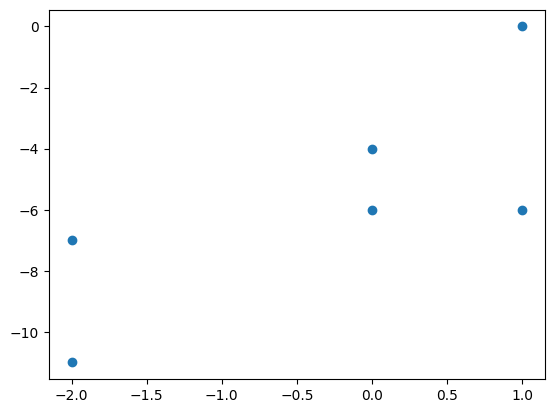

In [9]:
plt.scatter(x_exemplo, y_exemplo)


In [10]:
np.c_[x_exemplo, y_exemplo]

array([[ -2,  -7],
       [ -2, -11],
       [  0,  -4],
       [  0,  -6],
       [  1,   0],
       [  1,  -6]])

In [11]:
x_exemplo

array([-2, -2,  0,  0,  1,  1])

In [12]:
y_exemplo

array([ -7, -11,  -4,  -6,   0,  -6])

In [13]:
sum(y_exemplo)

-34

```
a1 para g_1(x) = x
a0 para g_0(x) = 1
```

In [14]:
def g1(x):return x
def g0(x):return np.ones(len(x))


In [15]:
xe = x_exemplo
ye = y_exemplo

In [16]:
a00 = sum(g0(xe)*g0(xe))
a01 = sum(g0(xe)*g1(xe))
a10 = sum(g1(xe)*g0(xe))
a11 = sum(g1(xe)*g1(xe))


In [17]:
b0 = sum(ye*g0(xe))
b1 = sum(ye*g1(xe))


In [18]:
a = np.array([
    [a00, a01],
    [a10, a11],
])

In [19]:
b = np.array([b0, b1])

In [20]:
a

array([[ 6., -2.],
       [-2., 10.]])

In [21]:
b

array([-34.,  30.])

## Resolvedor de equações lineares do numpy

In [22]:
alpha = np.linalg.solve(a, b)

In [23]:
alpha

array([-5.,  2.])

In [24]:
xe_ls = np.linspace(-2, 1, 100)
f_exemplo = alpha[0]*g0(xe_ls) + alpha[1]*g1(xe_ls)

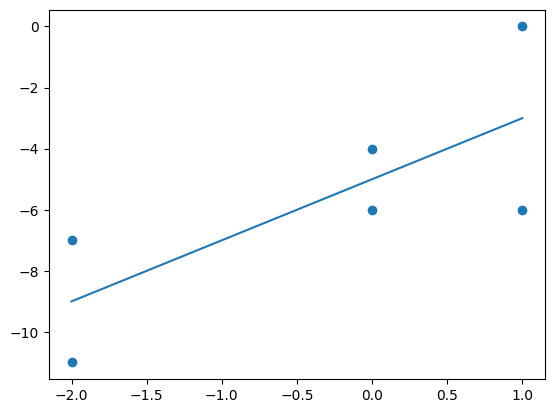

In [25]:
plt.plot(xe_ls, f_exemplo)
plt.scatter(x_exemplo, y_exemplo)
plt.savefig('q_01')


## Regressor linear do sklearn



In [74]:
x_min = -10
x_max = 10
x_range = x_max - x_min

In [75]:
x_size = 100
x = x_min + np.random.rand(x_size)*x_range

In [76]:
x


array([ 8.06211478,  7.966679  ,  4.57527201,  4.1756229 , -4.79801109,
        4.23675425, -9.61593465,  0.17740659, -9.74198508,  8.20149041,
       -7.67920831, -3.75290161,  7.77998695, -5.22664845, -4.68705723,
       -3.05642775,  6.19311293, -8.90557396, -8.94660742, -3.0725574 ,
       -9.89492007,  5.85093319,  5.87008595, -4.62806856, -9.64932531,
       -4.1644596 , -8.60151789,  1.84056892, -0.72268845, -1.32967498,
        8.08854348, -5.60461382, -9.69812663,  5.3711202 ,  9.55408787,
        3.18553088,  1.02829258, -3.64270707,  8.86191924,  1.78576897,
        1.94340158,  3.68172321,  6.66270168,  9.94864346,  2.67897809,
       -4.81011615,  8.45072103,  5.52499023, -7.79547071,  0.59748576,
       -2.95706777, -9.05484093,  2.97314394, -9.02473644, -8.36507952,
       -2.90307692, -9.02104516,  5.66171919, -6.27875043, -1.82880959,
        7.08244466, -2.81425917, -9.270135  ,  9.84675033,  2.588568  ,
       -0.26948984, -6.44579928, -7.81629852, -5.93808611, -1.15

In [77]:
y = f(x) + 2*np.random.randn(x_size)

In [78]:
x_real = np.linspace(x_min, x_max, 100)
y_real = f(x_real)

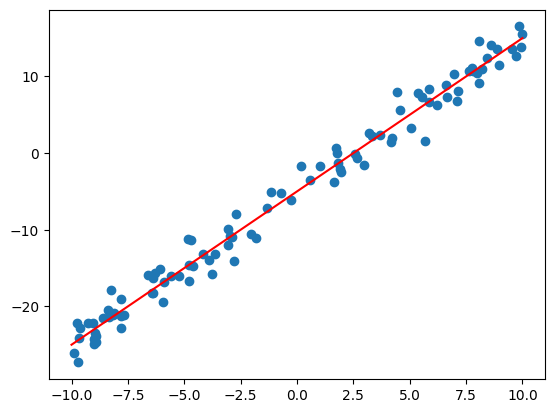

In [79]:
plt.plot(x_real, y_real, 'r')
plt.scatter(x=x, y=y)



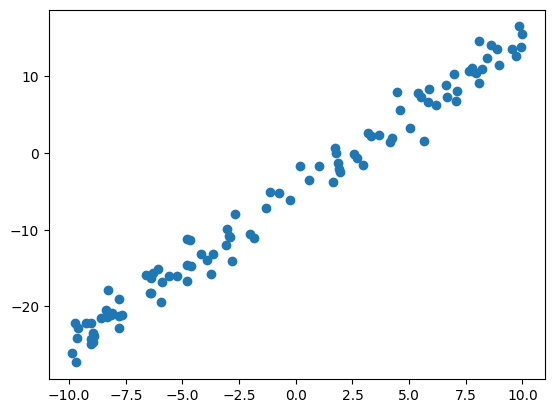

In [80]:
plt.scatter(x, y)

In [81]:
atributos = np.c_[g0(x), g1(x)]
target = y

In [82]:
atributos


array([[ 1.        ,  8.06211478],
       [ 1.        ,  7.966679  ],
       [ 1.        ,  4.57527201],
       [ 1.        ,  4.1756229 ],
       [ 1.        , -4.79801109],
       [ 1.        ,  4.23675425],
       [ 1.        , -9.61593465],
       [ 1.        ,  0.17740659],
       [ 1.        , -9.74198508],
       [ 1.        ,  8.20149041],
       [ 1.        , -7.67920831],
       [ 1.        , -3.75290161],
       [ 1.        ,  7.77998695],
       [ 1.        , -5.22664845],
       [ 1.        , -4.68705723],
       [ 1.        , -3.05642775],
       [ 1.        ,  6.19311293],
       [ 1.        , -8.90557396],
       [ 1.        , -8.94660742],
       [ 1.        , -3.0725574 ],
       [ 1.        , -9.89492007],
       [ 1.        ,  5.85093319],
       [ 1.        ,  5.87008595],
       [ 1.        , -4.62806856],
       [ 1.        , -9.64932531],
       [ 1.        , -4.1644596 ],
       [ 1.        , -8.60151789],
       [ 1.        ,  1.84056892],
       [ 1.        ,

In [83]:
target


array([ 1.46343449e+01,  1.04136424e+01,  5.57230734e+00,  1.44405477e+00,
       -1.66592510e+01,  1.97844488e+00, -2.27875289e+01, -1.71515502e+00,
       -2.22132661e+01,  1.09933632e+01, -2.11526155e+01, -1.57104979e+01,
        1.11539116e+01, -1.60858230e+01, -1.13828138e+01, -9.93211960e+00,
        6.22424765e+00, -2.39238852e+01, -2.34759323e+01, -1.19718377e+01,
       -2.61296976e+01,  6.63932062e+00,  8.39713395e+00, -1.46668888e+01,
       -2.40919947e+01, -1.31158788e+01, -2.15656363e+01, -1.34820304e+00,
       -5.16489813e+00, -7.15491432e+00,  9.11990548e+00, -1.59687943e+01,
       -2.73164714e+01,  7.86502361e+00,  1.35414245e+01,  2.56836948e+00,
       -1.61929944e+00, -1.31018207e+01,  1.36327521e+01, -2.44657892e-02,
       -2.52862514e+00,  2.42060382e+00,  7.27007996e+00,  1.38376658e+01,
       -6.69649129e-01, -1.45347400e+01,  1.23453051e+01,  7.26480698e+00,
       -1.89823476e+01, -3.54465893e+00, -1.08119886e+01, -2.21268371e+01,
       -1.53942552e+00, -

In [84]:
from sklearn.linear_model import LinearRegression


In [85]:
lin_reg = LinearRegression()


In [86]:
lin_reg.fit(atributos, target)



LinearRegression()

In [87]:
lin_reg.predict(atributos)

array([ 11.10036534,  10.91009027,   4.14847327,   3.35167293,
       -14.53950802,   3.47355355, -24.14524213,  -4.61977003,
       -24.39655517,  11.37824548, -20.2838944 , -12.4558212 ,
        10.53787304, -15.39410367, -14.31829378, -11.06722658,
         7.37404328, -22.72896066, -22.81077111, -11.09938508,
       -24.70146926,   6.69182249,   6.7300083 , -14.20068513,
       -24.21181476, -13.27636485, -22.12274892,  -1.30384047,
        -6.41433432,  -7.6245136 ,  11.15305756, -16.14767204,
       -24.30911239,   5.73519544,  14.07498638,   1.37767716,
        -2.92331625, -12.23612085,  12.69497531,  -1.41309786,
        -1.09881786,   2.36696054,   8.31028576,  14.86163151,
         0.36773765, -14.56364248,  11.87514897,   6.04197377,
       -20.51569252,  -3.78223726, -10.86912765, -23.02656165,
         0.95423076, -22.96654083, -21.65134998, -10.76148339,
       -22.95918133,   6.31457712, -17.49173178,  -8.61966312,
         9.14714823, -10.58440303, -23.45580416,  14.65

In [88]:
lin_reg.intercept_, lin_reg.coef_

(-4.9734743750614205, array([0.       , 1.9937498]))

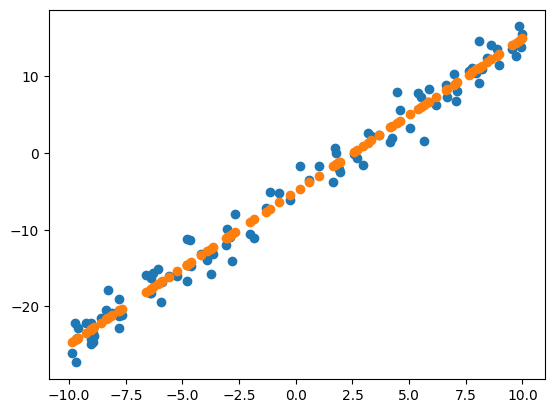

In [89]:
plt.scatter(x, y)
plt.scatter(x, lin_reg.predict(atributos))